In [ ]:
import numpy as np
import pandas as pd

#for charts and graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import scipy.stats as stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#for crossvalidation
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import metrics

In [ ]:
conn_data_train = pd.read_csv('https://github.com/Palakjhamnani/dataiitg/raw/main/Train_Data.csv')
conn_data_test = pd.read_csv('https://github.com/Palakjhamnani/dataiitg/raw/main/Test_Data.csv')

In [ ]:
conn_data_train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


In [ ]:
conn_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   land                    86845 non-null  int64  
 7   wrongfragment           86845 non-null  int64  
 8   urgent                  86845 non-null  int64  
 9   hot                     86845 non-null  int64  
 10  numfailedlogins         86845 non-null  int64  
 11  loggedin                86845 non-null  int64  
 12  numcompromised          86845 non-null  int64  
 13  rootshell               86845 non-null  int64  
 14  suattempted             86845 non-null

In [ ]:
cat_var_list = ['protocoltype', 'service', 'flag', 'land', 'wrongfragment', 'urgent', 'loggedin',
                'rootshell', 'suattempted', 'numshells', 'numaccessfiles', 'ishostlogin', 'isguestlogin',
]

In [ ]:
cat_var_train = conn_data_train[cat_var_list]
cat_var_train.head()
print(cat_var_train.shape)

#list of all categorical variables
cat_var_test = conn_data_test[cat_var_list]
cat_var_test.head()
print(cat_var_test.shape)

(86845, 13)
(21712, 13)


In [ ]:
cat_var_list

['protocoltype',
 'service',
 'flag',
 'land',
 'wrongfragment',
 'urgent',
 'loggedin',
 'rootshell',
 'suattempted',
 'numshells',
 'numaccessfiles',
 'ishostlogin',
 'isguestlogin']

In [ ]:
conn_data_train.columns.difference(cat_var_list)

Index(['attack', 'count', 'diffsrvrate', 'dstbytes', 'dsthostcount',
       'dsthostdiffsrvrate', 'dsthostrerrorrate', 'dsthostsamesrcportrate',
       'dsthostsamesrvrate', 'dsthostserrorrate', 'dsthostsrvcount',
       'dsthostsrvdiffhostrate', 'dsthostsrvrerrorrate',
       'dsthostsrvserrorrate', 'duration', 'hot', 'lastflag', 'numcompromised',
       'numfailedlogins', 'numfilecreations', 'numoutboundcmds', 'numroot',
       'rerrorrate', 'samesrvrate', 'serrorrate', 'srcbytes', 'srvcount',
       'srvdiffhostrate', 'srvrerrorrate', 'srvserrorrate'],
      dtype='object')

In [ ]:
cont_var_train = conn_data_train[conn_data_train.columns.difference(cat_var_list)]
cont_var_test = conn_data_test[conn_data_test.columns.difference(cat_var_list)]
cont_var_train.head()

,attack,count,diffsrvrate,dstbytes,dsthostcount,dsthostdiffsrvrate,dsthostrerrorrate,dsthostsamesrcportrate,dsthostsamesrvrate,dsthostserrorrate,...,numoutboundcmds,numroot,rerrorrate,samesrvrate,serrorrate,srcbytes,srvcount,srvdiffhostrate,srvrerrorrate,srvserrorrate
0,1,277,0.06,0,255,0.06,1.00,0.00,0.06,0.00,...,0,0,1.0,0.05,0.0,0,15,0.00,1.0,0.0
1,0,1,0.00,400,255,0.04,0.02,0.00,0.45,0.11,...,0,0,0.0,1.00,0.0,1239,1,0.00,0.0,0.0
2,0,21,0.00,945,57,0.00,0.00,0.02,1.00,0.00,...,0,0,0.0,1.00,0.0,222,25,0.08,0.0,0.0
3,0,4,0.00,1380,255,0.00,0.00,0.00,1.00,0.00,...,0,0,0.0,1.00,0.0,235,4,0.00,0.0,0.0
4,1,256,0.06,0,255,0.08,1.00,0.00,0.01,0.00,...,0,0,1.0,0.01,0.0,0,3,0.00,1.0,0.0


In [ ]:
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),x.std(),
                      x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25),
                      x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95),
                      x.quantile(0.99), x.max()],
                    index = ['N', 'NMiss', 'Sum', 'Mean', 'Median', 'SD', 'Var', 'Min', 'P1', 'P5', 'P10','P25',
                            'P50', 'P75', 'P90', 'P95', 'P99', 'Max'])


In [ ]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0,1],
                     round((Mode.iloc[0,1]*100)/x.count(), 2)],
                     index = ['N', 'NMiss', 'Mode', 'Freq', 'Percent'])

In [ ]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first= True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace= True)
    return df

In [ ]:
cont_var_summary = cont_var_train.apply(lambda x : continous_var_summary(x)).T.round(1)
cont_var_summary

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
attack,86845.0,0.0,32998.0,0.4,0.0,0.5,2.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
count,86845.0,0.0,6911554.0,79.6,16.0,98.1,9.617300e+03,0.0,1.0,1.0,1.0,2.0,16.0,143.0,247.0,273.0,297.0,511.0
diffsrvrate,86845.0,0.0,3928.1,0.0,0.0,0.1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.8,1.0
dstbytes,86845.0,0.0,237268766.0,2732.1,44.0,55430.4,3.072531e+09,0.0,0.0,0.0,0.0,0.0,44.0,768.0,3755.0,8822.0,27225.4,7028652.0
dsthostcount,86845.0,0.0,16154218.0,186.0,255.0,95.9,9.205800e+03,0.0,1.0,7.0,20.0,93.0,255.0,255.0,255.0,255.0,255.0,255.0
dsthostdiffsrvrate,86845.0,0.0,4358.4,0.1,0.0,0.1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.6,1.0
dsthostrerrorrate,86845.0,0.0,8023.7,0.1,0.0,0.3,1.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.0,1.0,1.0
dsthostsamesrcportrate,86845.0,0.0,6583.7,0.1,0.0,0.2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.5,1.0,1.0
dsthostsamesrvrate,86845.0,0.0,45720.1,0.5,0.6,0.4,2.000000e-01,0.0,0.0,0.0,0.0,0.0,0.6,1.0,1.0,1.0,1.0,1.0
dsthostserrorrate,86845.0,0.0,28195.6,0.3,0.0,0.5,2.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
cat_var_summary = cat_var_train.apply(lambda x : categorical_var_summary(x)).T
cat_var_summary

,N,NMiss,Mode,Freq,Percent
protocoltype,86845,0,tcp,75876,87.37
service,86845,0,http,31505,36.28
flag,86845,0,SF,50672,58.35
land,86845.0,0.0,0.0,86841.0,100.0
wrongfragment,86845.0,0.0,0.0,86845.0,100.0
urgent,86845.0,0.0,0.0,86843.0,100.0
loggedin,86845.0,0.0,0.0,48534.0,55.89
rootshell,86845.0,0.0,0.0,86728.0,99.87
suattempted,86845.0,0.0,0.0,86782.0,99.93
numshells,86845.0,0.0,0.0,86816.0,99.97


In [ ]:
cont_var_train = cont_var_train.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
cont_var_test = cont_var_test.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [ ]:
cont_var_train.apply(lambda x : continous_var_summary(x)).T

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
attack,86845.0,0.0,3.299800e+04,0.379964,0.00,0.485380,2.355941e-01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000,1.00,1.0000,1.00
count,86845.0,0.0,6.889755e+06,79.333928,16.00,97.349582,9.476941e+03,1.00,1.00,1.00,1.00,2.00,16.00,143.00,247.000,273.00,297.0000,297.00
diffsrvrate,86845.0,0.0,3.721790e+03,0.042856,0.00,0.104797,1.098246e-02,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.070,0.11,0.7500,0.75
dstbytes,86845.0,0.0,1.294304e+08,1490.360998,44.00,4105.799133,1.685759e+07,0.00,0.00,0.00,0.00,0.00,44.00,768.00,3755.000,8822.00,27223.8816,27225.36
dsthostcount,86845.0,0.0,1.615422e+07,186.012091,255.00,95.946916,9.205811e+03,1.00,1.00,7.00,20.00,93.00,255.00,255.00,255.000,255.00,255.0000,255.00
dsthostdiffsrvrate,86845.0,0.0,4.246560e+03,0.048898,0.03,0.094203,8.874233e-03,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.080,0.10,0.6500,0.65
dsthostrerrorrate,86845.0,0.0,8.023700e+03,0.092391,0.00,0.282768,7.995767e-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.106,1.00,1.0000,1.00
dsthostsamesrcportrate,86845.0,0.0,6.583700e+03,0.075810,0.00,0.208388,4.342570e-02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.200,0.50,1.0000,1.00
dsthostsamesrvrate,86845.0,0.0,4.572012e+04,0.526457,0.55,0.447353,2.001251e-01,0.00,0.00,0.01,0.02,0.05,0.55,1.00,1.000,1.00,1.0000,1.00
dsthostserrorrate,86845.0,0.0,2.819560e+04,0.324666,0.00,0.464291,2.155664e-01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000,1.00,1.0000,1.00


In [ ]:
cat_var_list = list(cat_var_train.columns)
cat_var_list

['protocoltype',
 'service',
 'flag',
 'land',
 'wrongfragment',
 'urgent',
 'loggedin',
 'rootshell',
 'suattempted',
 'numshells',
 'numaccessfiles',
 'ishostlogin',
 'isguestlogin']

In [ ]:
for c_feature in cat_var_list:
    cat_var_train[c_feature] = cat_var_train[c_feature].astype('category')
    cat_var_train = create_dummies(cat_var_train, c_feature)

for c_feature in cat_var_list:
    cat_var_test[c_feature] = cat_var_test[c_feature].astype('category')
    cat_var_test = create_dummies(cat_var_test, c_feature)

<ipython-input-55-79af214ead66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_var_train[c_feature] = cat_var_train[c_feature].astype('category')
<ipython-input-55-79af214ead66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_var_test[c_feature] = cat_var_test[c_feature].astype('category')


In [ ]:
cat_var_train.head()

,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,numaccessfiles_2,numaccessfiles_3,numaccessfiles_4,numaccessfiles_5,numaccessfiles_6,numaccessfiles_7,numaccessfiles_8,numaccessfiles_9,ishostlogin_1,isguestlogin_1
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
cat_var_test.head()

,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,rootshell_1,suattempted_1,suattempted_2,numshells_1,numaccessfiles_1,numaccessfiles_2,numaccessfiles_3,numaccessfiles_6,numaccessfiles_8,isguestlogin_1
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
conn_data_train_new = pd.concat([cont_var_train, cat_var_train], axis = 1)
conn_data_train_new.head()

,attack,count,diffsrvrate,dstbytes,dsthostcount,dsthostdiffsrvrate,dsthostrerrorrate,dsthostsamesrcportrate,dsthostsamesrvrate,dsthostserrorrate,...,numaccessfiles_2,numaccessfiles_3,numaccessfiles_4,numaccessfiles_5,numaccessfiles_6,numaccessfiles_7,numaccessfiles_8,numaccessfiles_9,ishostlogin_1,isguestlogin_1
0,1,277,0.06,0.0,255,0.06,1.00,0.00,0.06,0.00,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0.00,400.0,255,0.04,0.02,0.00,0.45,0.11,...,False,False,False,False,False,False,False,False,False,False
2,0,21,0.00,945.0,57,0.00,0.00,0.02,1.00,0.00,...,False,False,False,False,False,False,False,False,False,False
3,0,4,0.00,1380.0,255,0.00,0.00,0.00,1.00,0.00,...,False,False,False,False,False,False,False,False,False,False
4,1,256,0.06,0.0,255,0.08,1.00,0.00,0.01,0.00,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
conn_data_test_new = pd.concat([cont_var_test, cat_var_test], axis = 1)
conn_data_test_new.head()

,count,diffsrvrate,dstbytes,dsthostcount,dsthostdiffsrvrate,dsthostrerrorrate,dsthostsamesrcportrate,dsthostsamesrvrate,dsthostserrorrate,dsthostsrvcount,...,rootshell_1,suattempted_1,suattempted_2,numshells_1,numaccessfiles_1,numaccessfiles_2,numaccessfiles_3,numaccessfiles_6,numaccessfiles_8,isguestlogin_1
0,249,0.07,0.0,255,0.08,1.0,0.0,0.03,0.0,7,...,False,False,False,False,False,False,False,False,False,False
1,9,0.00,1721.0,255,0.00,0.0,0.0,1.00,0.0,255,...,False,False,False,False,False,False,False,False,False,False
2,16,0.38,0.0,255,0.09,0.0,0.0,0.05,1.0,14,...,False,False,False,False,False,False,False,False,False,False
3,297,0.05,0.0,255,0.09,0.0,0.0,0.01,1.0,2,...,False,False,False,False,False,False,False,False,False,False
4,104,0.06,0.0,255,0.06,0.0,0.0,0.06,1.0,16,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
conn_data_train_new.drop(columns= ['numfailedlogins','numfilecreations', 'numoutboundcmds', 'numroot'], inplace=True)

conn_data_test_new.drop(columns= ['numfailedlogins','numfilecreations', 'numoutboundcmds', 'numroot'], inplace=True)

In [ ]:
corr_network = conn_data_train_new.corr()

In [ ]:
corr_network.to_excel('corr_network.xlsx')

<Axes: >

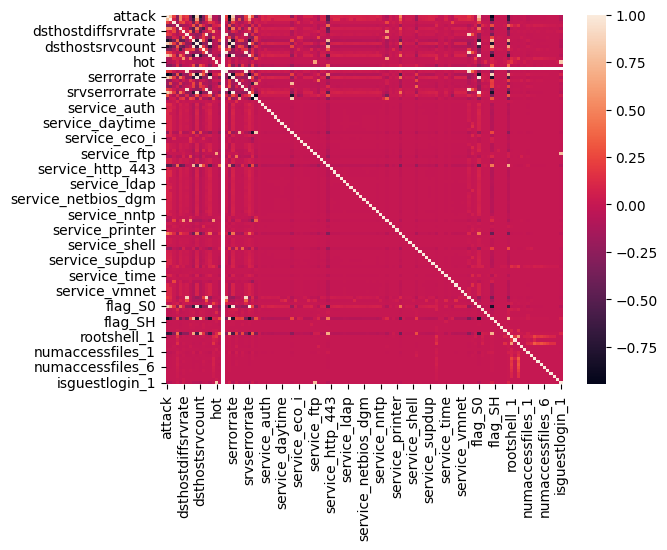

In [ ]:
sns.heatmap(corr_network)

In [ ]:
# Get missing columns in the training test
missing_cols = set(conn_data_train_new.columns ) - set( conn_data_test_new.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    conn_data_test_new[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
conn_data_test_new = conn_data_test_new[conn_data_train_new.columns]

In [ ]:
conn_data_train_new.shape

(86845, 121)

In [ ]:
conn_data_test_new.shape

(21712, 121)

In [ ]:
feature_columns = conn_data_train_new.columns.difference(['attack'])
feature_columns

Index(['count', 'diffsrvrate', 'dstbytes', 'dsthostcount',
       'dsthostdiffsrvrate', 'dsthostrerrorrate', 'dsthostsamesrcportrate',
       'dsthostsamesrvrate', 'dsthostserrorrate', 'dsthostsrvcount',
       ...
       'service_whois', 'srcbytes', 'srvcount', 'srvdiffhostrate',
       'srvrerrorrate', 'srvserrorrate', 'suattempted_1', 'suattempted_2',
       'urgent_1', 'urgent_2'],
      dtype='object', length=120)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(conn_data_train_new[feature_columns],
                                                   conn_data_train_new['attack'], test_size = 0.3, random_state = 222)
print('No. of observation train: ' , train_x.shape[0], ' | ', 'No. of observation test: ' ,test_x.shape[0])

No. of observation train:  60791  |  No. of observation test:  26054


In [ ]:
para_grid_rf = {'n_estimators' : [50,70,80,90,100],
                'max_features' : [19,20,21,22,23,24]}

gscv_rf = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=para_grid_rf,
                       cv = 2,
                       verbose = 2,
                       n_jobs =-1)

gscv_rf.fit(train_x, train_y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [19, 20, 21, 22, 23, 24],
                         'n_estimators': [50, 70, 80, 90, 100]},
             verbose=2)

In [ ]:
gscv_rf.best_score_

0.9999506514015002

In [ ]:
gscv_rf.best_params_

{'max_features': 20, 'n_estimators': 100}

In [ ]:
gscv_rf.best_estimator_

RandomForestClassifier(max_features=20)

In [ ]:
rf = gscv_rf.best_estimator_

#rf = RandomForestClassifier(oob_score=True, n_estimators= 110)
rf.fit(train_x, train_y)

RandomForestClassifier(max_features=20)

In [ ]:
rf_train_predict = pd.DataFrame({'actual' : train_y,
                                 'predicted' : rf.predict(train_x)})
rf_train_predict.head()

,actual,predicted
59166,1,1
34580,0,0
11980,0,0
2617,0,0
379,1,1


In [ ]:
rf_test_predict = pd.DataFrame({'actual' : test_y,
                                'predicted' : rf.predict(test_x)})
rf_test_predict.head()

,actual,predicted
22257,0,0
79315,0,0
472,0,0
29359,0,0
64519,1,1


In [ ]:
test_predicted = rf.predict(conn_data_test_new[feature_columns])

In [ ]:
test_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
test_predicted.shape

(21712,)

In [ ]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for validation dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

print('Accuracy Score for test dataset : ' , metrics.accuracy_score(conn_data_test_new.attack, test_predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for validation dataset :  1.0
Accuracy Score for test dataset :  0.6216838614591009


In [ ]:
print(metrics.classification_report(conn_data_test_new.attack, test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77     21712
           1       0.00      0.00      0.00         0

    accuracy                           0.62     21712
   macro avg       0.50      0.31      0.38     21712
weighted avg       1.00      0.62      0.77     21712



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
feature_columns = conn_data_test_new.columns.difference(['attack'])
feature_columns

Index(['count', 'diffsrvrate', 'dstbytes', 'dsthostcount',
       'dsthostdiffsrvrate', 'dsthostrerrorrate', 'dsthostsamesrcportrate',
       'dsthostsamesrvrate', 'dsthostserrorrate', 'dsthostsrvcount',
       ...
       'service_whois', 'srcbytes', 'srvcount', 'srvdiffhostrate',
       'srvrerrorrate', 'srvserrorrate', 'suattempted_1', 'suattempted_2',
       'urgent_1', 'urgent_2'],
      dtype='object', length=120)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
from google.colab import files

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'attack': test_predicted
})

# Ensure the submission DataFrame has the same number of rows as test.csv
submission_df = submission_df[:21712]  # Adjust if necessary

# Save the submission DataFrame to a CSV file
submission_df.to_csv('/content/submission_new.csv', index=False)

# Download the submission file
files.download('/content/submission_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>